In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/HeartDiseaseTrain-Test - HeartDiseaseTrain-Test.csv (3).csv')

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [ ]:
df.shape

(1225, 14)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1225 non-null   int64  
 1   sex                            1225 non-null   object 
 2   chest_pain_type                1225 non-null   object 
 3   resting_blood_pressure         1225 non-null   int64  
 4   cholestoral                    1225 non-null   int64  
 5   fasting_blood_sugar            1225 non-null   object 
 6   rest_ecg                       1225 non-null   object 
 7   Max_heart_rate                 1225 non-null   int64  
 8   exercise_induced_angina        1225 non-null   object 
 9   oldpeak                        1225 non-null   float64
 10  slope                          1225 non-null   object 
 11  vessels_colored_by_flourosopy  1225 non-null   object 
 12  thalassemia                    1225 non-null   o

In [ ]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,54.188571,132.291429,248.533878,146.684898,1.409061,0.507755
std,10.050341,19.375692,57.159812,26.854522,1.488087,0.500144
min,29.000000,90.000000,125.000000,71.000000,0.000000,0.000000
25%,46.000000,120.000000,209.000000,130.000000,0.000000,0.000000
50%,55.000000,130.000000,242.000000,151.000000,1.000000,1.000000
75%,62.000000,141.000000,283.000000,166.000000,2.200000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [ ]:
df.rename(columns={"cholestoral": "cholesterol"}, inplace=True)

In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
cat_col

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia']

In [ ]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
num_col

['age',
 'resting_blood_pressure',
 'cholesterol',
 'Max_heart_rate',
 'oldpeak',
 'target']

In [ ]:
numerical_corr = {}
for col in num_col:
    if col == 'target':
      continue
    corr = df["target"].corr(df[col])
    print(col, corr)
    numerical_corr[col] = corr

age -0.18387267876802246
resting_blood_pressure -0.10852640696342332
cholesterol -0.06355965086732761
Max_heart_rate 0.31861852154265763
oldpeak -0.3133314694623373


<Axes: >

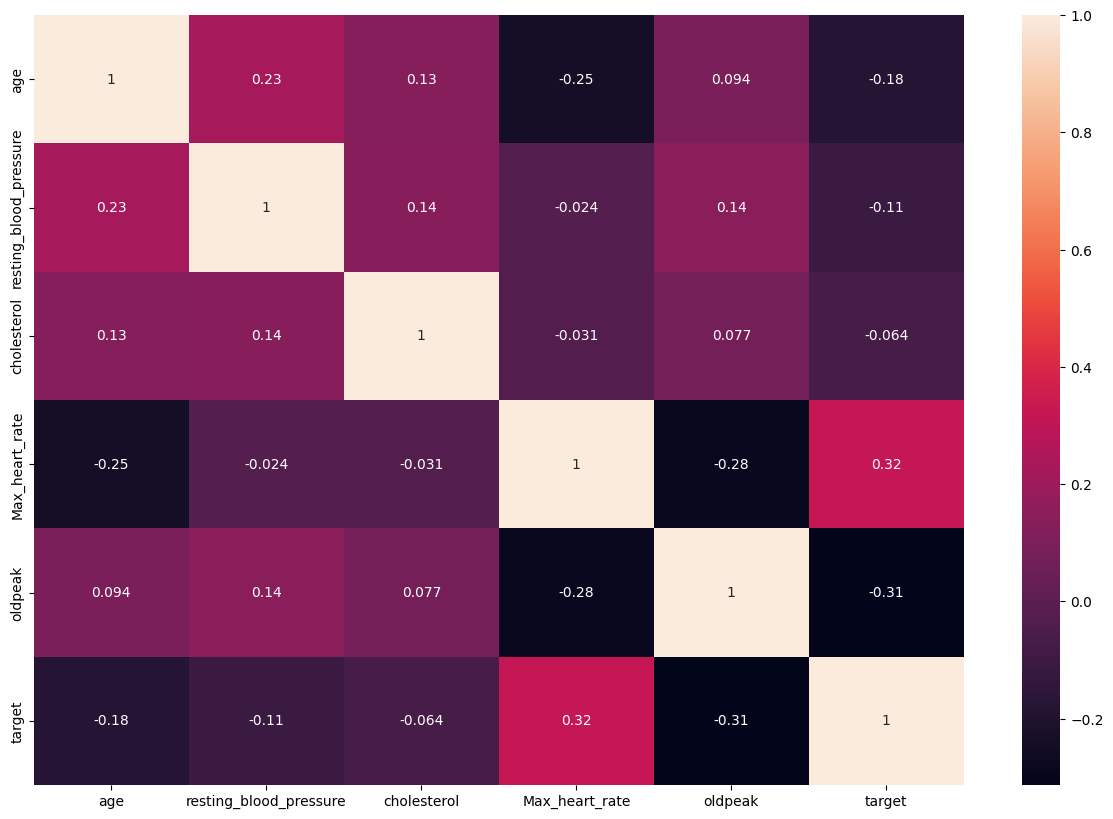

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
sort_corr = sorted(numerical_corr.items(), key=lambda ele:abs(ele[1]))

for i in sort_corr:
    print(f"{i[0]}:{abs(i[1])}")

cholesterol:0.06355965086732761
resting_blood_pressure:0.10852640696342332
age:0.18387267876802246
oldpeak:0.3133314694623373
Max_heart_rate:0.31861852154265763


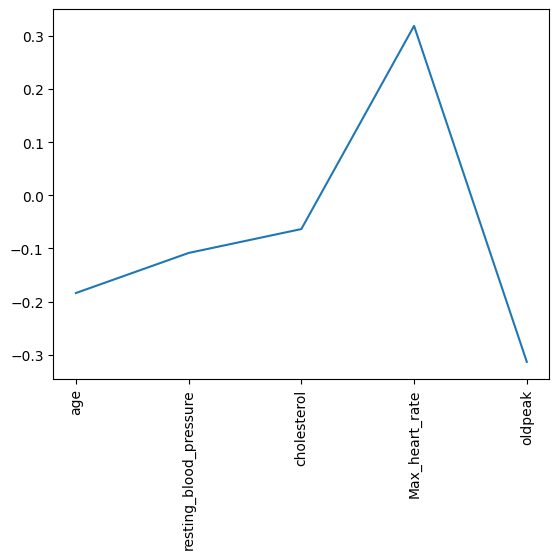

In [ ]:
plt.plot(numerical_corr.keys(),numerical_corr.values())
plt.xticks(rotation=90)
plt.show()

 The oldpeak has the highest impact on heart disease whereas cholesterol has the lowest and max_heart rate also plays a significant role in this but it is still unknow about Good cholesterol? Bad cholesterol? perhaps a combination of both in a skewed ratio?

In [ ]:
import plotly.express as px

First  I should check that by data is baised or not.

In [ ]:
df['target'].value_counts()

,count
target,
1,622
0,603


It is clear that dataset is not baised and we can proceed with the outlier detection in numerical features.

 I found this plotly in kaggle which is a library to visualize the data in more interractive way, so i am going to use it here.

In [ ]:
template = "plotly_white"
# color_scale = "Bluered"
# color_discrete_sequence=["lightblue", "orangered"] # For discrete map visualization
num_data = df
# Convert target to string for discrete color representation
num_data["target"] = num_data["target"].astype(str)

In [ ]:
fig1 = px.box(data_frame=num_data, x="cholesterol", y="target", template=template, title="Cholesterol vs Heart Disease",color=num_data['target'])
fig1.show();

In [ ]:
fig2 = px.box(data_frame=df, x="Max_heart_rate", y="target", template=template, title="Max_heart_rate vs heart disease",color=num_data['target'])
fig2.show();

In [ ]:
fig3 = px.box(data_frame=df, x="target", y="age", template=template, title="Age vs heart disease",color=num_data['target'])
fig3.show();

In [ ]:
fig4 = px.box(data_frame=df, x="resting_blood_pressure", y="target", template=template, title="Resting blood pressure vs heart disease",color=num_data['target'])
fig4.show();

In [ ]:
fig5 = px.box(data_frame=df, x="oldpeak", y="target", template=template, title="Oldpeak vs heart disease",color=num_data['target'])
fig5.show();

In [ ]:
sex_map = {
    "Male": 1,
    "Female": 0
}
chest_pain_map = {
    "Typical angina": 1,
    "Atypical angina": 2,
    "Non-anginal pain": 3,
    "Asymptomatic": 4
}
blood_sugar_map = {
    "Lower than 120 mg/ml": 0,
    "Greater than 120 mg/ml": 1
}
rest_ecg_map = {
    "Normal": 0,
    "ST-T wave abnormality": 1,
    "Left ventricular hypertrophy": 2,
}
exercise_angina_map = {
    "Yes": 1,
    "No": 0
}
slope_map = {
    "Upsloping": 1,
    "Flat": 2,
    "Downsloping": 3
}
fluoroscopy_map = {
    "Zero": 0,
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4
}
thalassemia_map = {
    "No": 0,
    "Normal": 3,
    "Fixed Defect": 6,
    "Reversable Defect": 7
}

In [ ]:
df_cat = df

In [ ]:
df_cat["sex"].replace(sex_map, inplace=True)
df_cat["chest_pain_type"].replace(chest_pain_map, inplace=True)
df_cat["fasting_blood_sugar"].replace(blood_sugar_map, inplace=True)
df_cat["rest_ecg"].replace(rest_ecg_map, inplace=True)
df_cat["exercise_induced_angina"].replace(exercise_angina_map, inplace=True)
df_cat["slope"].replace(slope_map, inplace=True)
df_cat["vessels_colored_by_flourosopy"].replace(fluoroscopy_map, inplace=True)
df_cat["thalassemia"].replace(thalassemia_map, inplace=True)

df_cat["target"] = df_cat["target"].astype(np.int64)

In [ ]:
# Reset df_raw
df_raw = pd.read_csv("/content/HeartDiseaseTrain-Test - HeartDiseaseTrain-Test.csv (3).csv")
# Fix minor typo from Cholestoral to Cholesterol
df_raw.rename(columns={"cholestoral": "cholesterol"}, inplace=True)

In [ ]:
cat_cols = list(df_raw.select_dtypes(include=object))
cat_corr = {}
for col in cat_cols:
    corr = df_cat["target"].corr(df_cat[col])
    cat_corr[col] = corr

In [ ]:
# Sort by absolute impact
cat_corr_sorted = sorted(cat_corr.items(), key=lambda ele:abs(ele[1]))
cat_corr_sorted

[('fasting_blood_sugar', -0.022532836974106032),
 ('thalassemia', -0.09726269251664274),
 ('rest_ecg', 0.11144321883191778),
 ('sex', -0.24761818746101477),
 ('slope', 0.280888627817472),
 ('vessels_colored_by_flourosopy', -0.3265528179011671),
 ('exercise_induced_angina', -0.37945816872752247),
 ('chest_pain_type', 0.38815099500260014)]

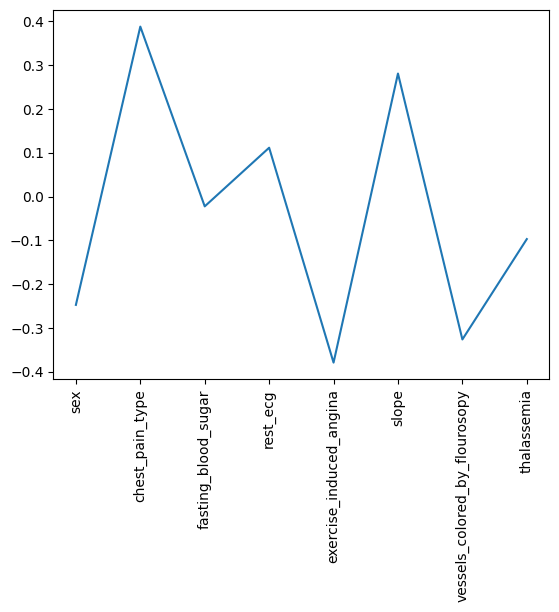

In [ ]:
plt.plot(cat_corr.keys(),cat_corr.values())
plt.xticks(rotation=90)
plt.show()

It can be clearly seen fasting blood sugar has the least impact on heart disease in this distribution whereas exercise induced angina has the most impact.

In [ ]:
df_cat_str = df_raw
for col in cat_cols:
    df_cat_str[col] = df_raw[col].astype(str)
df_cat_str["target"] = df_raw["target"]

In [ ]:
px.histogram(data_frame=df_cat_str, x="fasting_blood_sugar", color="target" , template=template, title="Fasting blood sugar - Heart Disease 0: <120 mg/dl, 1: >120 mg/dl")

In [ ]:
px.histogram(data_frame=df_cat_str, x="sex", color="target" , template=template, title="Sex & Heart Disease")

In [ ]:
px.histogram(data_frame=df_cat_str, x="thalassemia", color="target" , template=template, title="Thalassemia vs Heart Disease")

In [ ]:
px.histogram(data_frame=df_cat_str, x="slope", color="target" , template=template, title="Slope of peak exercise ST vs Heart Disease")

In [ ]:
px.histogram(data_frame=df_cat_str, x="vessels_colored_by_flourosopy", color="target" , template=template, title="Vessels colored by flourosopy vs Heart Disease")

In [ ]:
px.histogram(data_frame=df_cat_str, x="chest_pain_type", color="target" , template=template, title="Chest Pain Type vs Heart Disease")

In [ ]:
px.histogram(data_frame=df_cat_str, x="exercise_induced_angina", color="target" , template=template, title="Exercise induced angina vs Heart Disease")

In [ ]:
for col in cat_cols:
    df_cat[col] = df_cat[col].astype(int)

In [ ]:
Results = {}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
x = df.columns[:-1]
y = df.columns[-1]
x

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia'],
      dtype='object')

In [ ]:
y

'target'

In [ ]:
x = df[x]
y = df[y]

In [ ]:
x.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
0,52,1,1,125,212,0,1,168,0,1.0,3,2,7
1,53,1,1,140,203,1,0,155,1,3.1,1,0,7
2,70,1,1,145,174,0,1,125,1,2.6,1,0,7
3,61,1,1,148,203,0,1,161,0,0.0,3,1,7
4,62,0,1,138,294,1,1,106,0,1.9,2,3,6


In [ ]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape

(980, 13)

In [ ]:
x_test.shape

(245, 13)

In [ ]:
y_train.shape

(980,)

In [ ]:
y_test.shape

(245,)

In [ ]:
logistic_reg = LogisticRegression(solver="liblinear")
logistic_reg.fit(x_train, y_train)
score_log = logistic_reg.score(x_test, y_test)
score_log

0.7795918367346939

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = logistic_reg.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[ 82,  28],
       [ 26, 109]])

As we can see with base model we are getting 85 accuracy, now lets apply hyperparameter tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500]
}

In [ ]:
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate on test data
score_log = grid_search.score(x_test, y_test)

best_params, best_score, score_log

({'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'},
 0.7795918367346938,
 0.7755102040816326)

In [ ]:
low_corr = ["cholesterol", "resting_blood_pressure", "fasting_blood_sugar"]
# Drop low correlation columns
high_corr_df = df.drop(low_corr, axis=1)
high_corr_df.head()

,age,sex,chest_pain_type,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,1,1,168,0,1.0,3,2,7,0
1,53,1,1,0,155,1,3.1,1,0,7,0
2,70,1,1,1,125,1,2.6,1,0,7,0
3,61,1,1,1,161,0,0.0,3,1,7,0
4,62,0,1,1,106,0,1.9,2,3,6,0


In [ ]:
inputs_non_naive = high_corr_df.iloc[:, :-1]
target_col = df.columns[-1]
targets = high_corr_df[target_col]
inputs_non_naive.shape, targets.shape

((1225, 10), (1225,))

In [ ]:
inputs_non_naive = high_corr_df.iloc[:, :-1]
targets = high_corr_df[target_col]
inputs_non_naive.shape, targets.shape

((1225, 10), (1225,))

In [ ]:
X_train_non_naive, X_test_non_naive, y_train_non_naive, y_test_non_naive = train_test_split(inputs_non_naive, targets, test_size=0.40, random_state=3)

In [ ]:
grid_search.fit(X_train_non_naive, y_train_non_naive)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate on test data
score_log = grid_search.score(X_test_non_naive, y_test_non_naive)

best_params, best_score, score_log

({'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'},
 0.7809523809523811,
 0.7714285714285715)

No improvement unfortunately. By filtering out features with low correlation

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
X_train_scaled = scaler.fit_transform(x_train.values)  # Convert DataFrame to NumPy array
X_test_scaled = scaler.transform(x_test.values)

# Step 6: Train SVC model without warning
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_scaled, y_train)

# Step 7: Make Predictions
y_pred = svc_model.predict(X_test_scaled)
svc_model.score(X_test_scaled, y_test)
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

0.7714285714285715

In [ ]:
from sklearn import tree

In [ ]:
model_tree = tree.DecisionTreeClassifier(max_depth=10)

In [ ]:
model_tree.fit(x_train, y_train)
model_tree_score = model_tree.score(x_test, y_test)
model_tree_score

0.9061224489795918

In [ ]:
y_pred = model_tree.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 99,  11],
       [ 12, 123]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
score_rf = random_forest.score(x_test, y_test)
score_rf

0.9020408163265307

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForest model
random_forest = RandomForestClassifier()

# Apply GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

# Best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Evaluate on test data
score_rf = grid_search_rf.score(x_test, y_test)

best_params_rf, best_score_rf, score_rf

({'bootstrap': True,
  'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9153061224489797,
 0.8857142857142857)

In [ ]:
from xgboost import XGBClassifier

# Create an XGBoost model
xgb_model = XGBClassifier()

# Fit the model
xgb_model.fit(x_train, y_train)

# Evaluate the model
score_xgb = xgb_model.score(x_test, y_test)

score_xgb

0.8938775510204081

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}


In [ ]:
best_params_xg = grid_search.best_params_
best_score_xg = grid_search.best_score_

# Evaluate on test data
score_rf = grid_search.score(x_test, y_test)
best_params_xg, best_score_xg, score_rf

({'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6},
 0.9163265306122449,
 0.8979591836734694)